In [36]:
#pip install python-docx

In [ ]:
from docx import Document

def read_word_file(filename):
    doc = Document(filename)
    result = []
    for paragraph in doc.paragraphs:
        result.append(paragraph.text)
    return "\n".join(result)

filename = 'Top Airline Stocks To Buy In 2023.docx' # 你的Word文档的文件名
news=read_word_file(filename)
print(news)

: 

In [2]:
#Import libraries
import pandas as pd
import numpy as np
#visualization
import matplotlib.pyplot as plt

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "/Users/limuqing/anaconda3/envs/tf_env/bin/python"
  * The NumPy version is: "1.23.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Users/limuqing/anaconda3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so, 0x0002): Library not loaded: @rpath/libcblas.3.dylib
  Referenced from: <47C3937E-13E1-3103-AB3D-5460F93E55D8> /Users/limuqing/anaconda3/envs/tf_env/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so
  Reason: tried: '/Users/limuqing/anaconda3/envs/tf_env/lib/python3.9/site-packages/numpy/core/../../../../libcblas.3.dylib' (no such file), '/Users/limuqing/anaconda3/envs/tf_env/lib/python3.9/site-packages/numpy/core/../../../../libcblas.3.dylib' (no such file), '/Users/limuqing/anaconda3/envs/tf_env/bin/../lib/libcblas.3.dylib' (no such file), '/Users/limuqing/anaconda3/envs/tf_env/bin/../lib/libcblas.3.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS@rpath/libcblas.3.dylib' (no such file), '/Users/limuqing/anaconda3/envs/tf_env/lib/python3.9/site-packages/numpy/core/../../../../libcblas.3.dylib' (no such file), '/Users/limuqing/anaconda3/envs/tf_env/lib/python3.9/site-packages/numpy/core/../../../../libcblas.3.dylib' (no such file), '/Users/limuqing/anaconda3/envs/tf_env/bin/../lib/libcblas.3.dylib' (no such file), '/Users/limuqing/anaconda3/envs/tf_env/bin/../lib/libcblas.3.dylib' (no such file), '/usr/local/lib/libcblas.3.dylib' (no such file), '/usr/lib/libcblas.3.dylib' (no such file, not in dyld cache)


In [3]:
#for text
import wikipediaapi
import nltk
import re

ModuleNotFoundError: No module named 'nltk'

In [4]:
#for nlp
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(u"This is a sentence.")
displacy.render(doc, style='dep', jupyter=True)
import textacy

ModuleNotFoundError: No module named 'spacy'

In [41]:
import networkx as nx

In [42]:
import dateparser

### 知识抽取

1.实体抽取

2.关系抽取

3.属性抽取

##自然语言处理

此类任务的库是SpaCy，它是一种开源软件，用于高级自然语言处理，利用Cython（C+Python）进行加速。SpaCy使用预训练的语言模型对文本进行标记化，并将其转换为“文档”对象，该对象包含模型预测的所有注释。

In [43]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(news)

NLP模型的第一个输出是句子分割(中文有自己的分词规则)：即确定句子的起始和结束位置的问题。

In [44]:
# from text to a list of sentences
lst_docs = [sent for sent in doc.sents]
print("tot sentences:", len(lst_docs))

tot sentences: 94


Test an example

In [81]:
lst_docs[1]

•	As the demand for air travel increases, this earnings season saw top-performing airline stocks post significant year-over-year growth and robust quant-rated fundamentals.

In [82]:
for token in lst_docs[20]:
    print (token.text,'-->','pos: '+token.pos_,'|','dep: '+token.dep_, '')

Consider --> pos: VERB | dep: ROOT 
these --> pos: DET | dep: det 
top --> pos: ADJ | dep: amod 
airline --> pos: NOUN | dep: compound 
stocks --> pos: NOUN | dep: dobj 
, --> pos: PUNCT | dep: punct 
Delta --> pos: PROPN | dep: compound 
Air --> pos: PROPN | dep: compound 
Lines --> pos: PROPN | dep: appos 
, --> pos: PUNCT | dep: punct 
United --> pos: PROPN | dep: compound 
Airlines --> pos: PROPN | dep: conj 
, --> pos: PUNCT | dep: punct 
and --> pos: CCONJ | dep: cc 
American --> pos: PROPN | dep: compound 
Airlines --> pos: PROPN | dep: conj 
, --> pos: PUNCT | dep: punct 
for --> pos: ADP | dep: prep 
a --> pos: DET | dep: det 
portfolio --> pos: NOUN | dep: pobj 
. --> pos: PUNCT | dep: punct 


In [83]:
from spacy import displacy

displacy.render(lst_docs[1], style="dep", options={"distance":100})

其中（POS=VERB）各位重要，因为它代表了动词，是句子里的词根.（POS=ADV/ADP）为助词，他们通常作为修饰语（DEP=mod）起到和动词相关联的作用。不同的动词配上不同的副词也同样会有不同的效果。名词通常位于形容词（POS=ADJ）的附近，作为其含义的修饰语（DEP=amod）.


## SpaCy的另一功能实体识别（NER）

In [84]:
for tag in lst_docs[1].ents:
    print(tag.text, f"({tag.label_})") 

In [86]:
#使用SpaCY的图形工具显示：
displacy.render(lst_docs[1],style='ent')

/Users/limuqing/anaconda3/envs/tf_env/lib/python3.9/site-packages/spacy/displacy/__init__.py:215: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [50]:
#返回实体和实体之间的关系
def extract_entities_relations(doc, nlp):
    a, b, prev_dep, prev_txt, prefix, modifier = "", "", "", "", "", ""
    relation = ""
    matcher = spacy.matcher.Matcher(nlp.vocab)
    p1 = [{'DEP':'ROOT'}, 
          {'DEP':'prep', 'OP':"?"},
          {'DEP':'agent', 'OP':"?"},
          {'POS':'ADJ', 'OP':"?"}] 
    matcher.add(key="matching_1", patterns=[p1])

    for token in doc:
        if token.dep_ != "punct":
            if token.dep_ == "compound":
                prefix = prev_txt +" "+ token.text if prev_dep == "compound" else token.text
            if token.dep_.endswith("mod") == True:
                modifier = prev_txt +" "+ token.text if prev_dep == "compound" else token.text
            if token.dep_.find("subj") == True:
                a = modifier +" "+ prefix + " "+ token.text
                prefix, modifier, prev_dep, prev_txt = "", "", "", ""
            if token.dep_.find("obj") == True:
                b = modifier +" "+ prefix +" "+ token.text
            prev_dep, prev_txt = token.dep_, token.text
    matches = matcher(doc)
    if len(matches) != 0: # make sure there's at least one match
        k = len(matches) - 1
        span = doc[matches[k][1]:matches[k][2]]
        relation = span.text
    a = " ".join([i for i in a.split()])
    b = " ".join([i for i in b.split()])
    return (a.strip(), relation.strip(),b.strip())


In [51]:
# 测试在我们的数据集上：
lst_ent=[extract_entities_relations(i,nlp) for i in lst_docs]

lst_ent[7]

('people', 'taking', 'biggest market share')

使用Textacy，这也是SpaCy的一个库

In [52]:
## extract entities and relations
dic = {"id":[], "text":[], "entity":[], "relation":[], "object":[]}

for n,sentence in enumerate(lst_docs):
    lst_generators = list(textacy.extract.subject_verb_object_triples(sentence))  
    for sent in lst_generators:
        subj = "_".join(map(str, sent.subject))
        obj  = "_".join(map(str, sent.object))
        relation = "_".join(map(str, sent.verb))
        dic["id"].append(n)
        dic["text"].append(sentence.text)
        dic["entity"].append(subj)
        dic["object"].append(obj)
        dic["relation"].append(relation)


## create dataframe
dtf = pd.DataFrame(dic)

## example
dtf[dtf["id"]==4]

,id,text,entity,relation,object
4,4,Top U.S. Airline Stocks Take Flight\nUnited Ai...,U.S._Airline_Stocks,Take,Flight_United_Airlines
5,4,Top U.S. Airline Stocks Take Flight\nUnited Ai...,U.S._Airline_Stocks,posted,record_earnings
6,4,Top U.S. Airline Stocks Take Flight\nUnited Ai...,revenue,topped,expectations
7,4,Top U.S. Airline Stocks Take Flight\nUnited Ai...,Q2_earnings,beat,line_results


使用NER（日期）提取属性：

In [54]:
## extract attributes
attribute = "DATE"
dic = {"id":[], "text":[], attribute:[]}

for n,sentence in enumerate(lst_docs):
    lst = list(textacy.extract.entities(sentence, include_types={attribute}))
    if len(lst) > 0:
        for attr in lst:
            dic["id"].append(n)
            dic["text"].append(sentence.text)
            dic[attribute].append(str(attr))
    else:
        dic["id"].append(n)
        dic["text"].append(sentence.text)
        dic[attribute].append(np.nan)

dtf_att = pd.DataFrame(dic)
dtf_att = dtf_att[~dtf_att[attribute].isna()]

## example
dtf_att[dtf_att["id"]==5]

,id,text,DATE
5,5,"Two of the top U.S. carriers, United Airlines ...",recent quarter
6,5,"Two of the top U.S. carriers, United Airlines ...",Thursday


In [71]:
## extract attributes
attributes = {"DATE", "PERCENT", "MONEY", "QUANTITY"}  # 指定你想要提取的属性
dic = {"id":[], "text":[], "entity": [], "entity_type": []}

for attr in attributes:
    dic[attr] = []

for n, sentence in enumerate(lst_docs):
    for ent in sentence.ents:
        dic["id"].append(n)
        dic["text"].append(sentence.text)
        dic["entity"].append(ent.text)
        dic["entity_type"].append(ent.label_)
        
        for attr in attributes:
            if ent.label_ == attr:
                dic[attr].append(ent.text)
            else:
                dic[attr].append(np.nan)

dtf_att = pd.DataFrame(dic)

## example
dtf_att[dtf_att["id"]==3]



,id,text,entity,entity_type,MONEY,QUANTITY,PERCENT,DATE
4,3,•\tUndervalued and offering year-over-year rev...,three,CARDINAL,NaN,NaN,NaN,NaN
5,3,•\tUndervalued and offering year-over-year rev...,Strong Buy,LOC,NaN,NaN,NaN,NaN
6,3,•\tUndervalued and offering year-over-year rev...,United Airlines,ORG,NaN,NaN,NaN,NaN
7,3,•\tUndervalued and offering year-over-year rev...,Delta Air Lines,ORG,NaN,NaN,NaN,NaN
8,3,•\tUndervalued and offering year-over-year rev...,American Airlines Group Inc.,ORG,NaN,NaN,NaN,NaN
9,3,•\tUndervalued and offering year-over-year rev...,nearly 50%,PERCENT,NaN,NaN,nearly 50%,NaN


## 网络图

使用网络X库（通常简写为nx）从数据帧创建一个有向图，然后绘制这个图。图中的每个节点代表一个实体，边代表实体之间的关系。图的布局（即节点的位置）是使用spring布局算法计算的，该算法试图将节点位置安排得尽可能均匀，以便将节点间的交叉边最小化。

/Users/limuqing/anaconda3/envs/tf_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


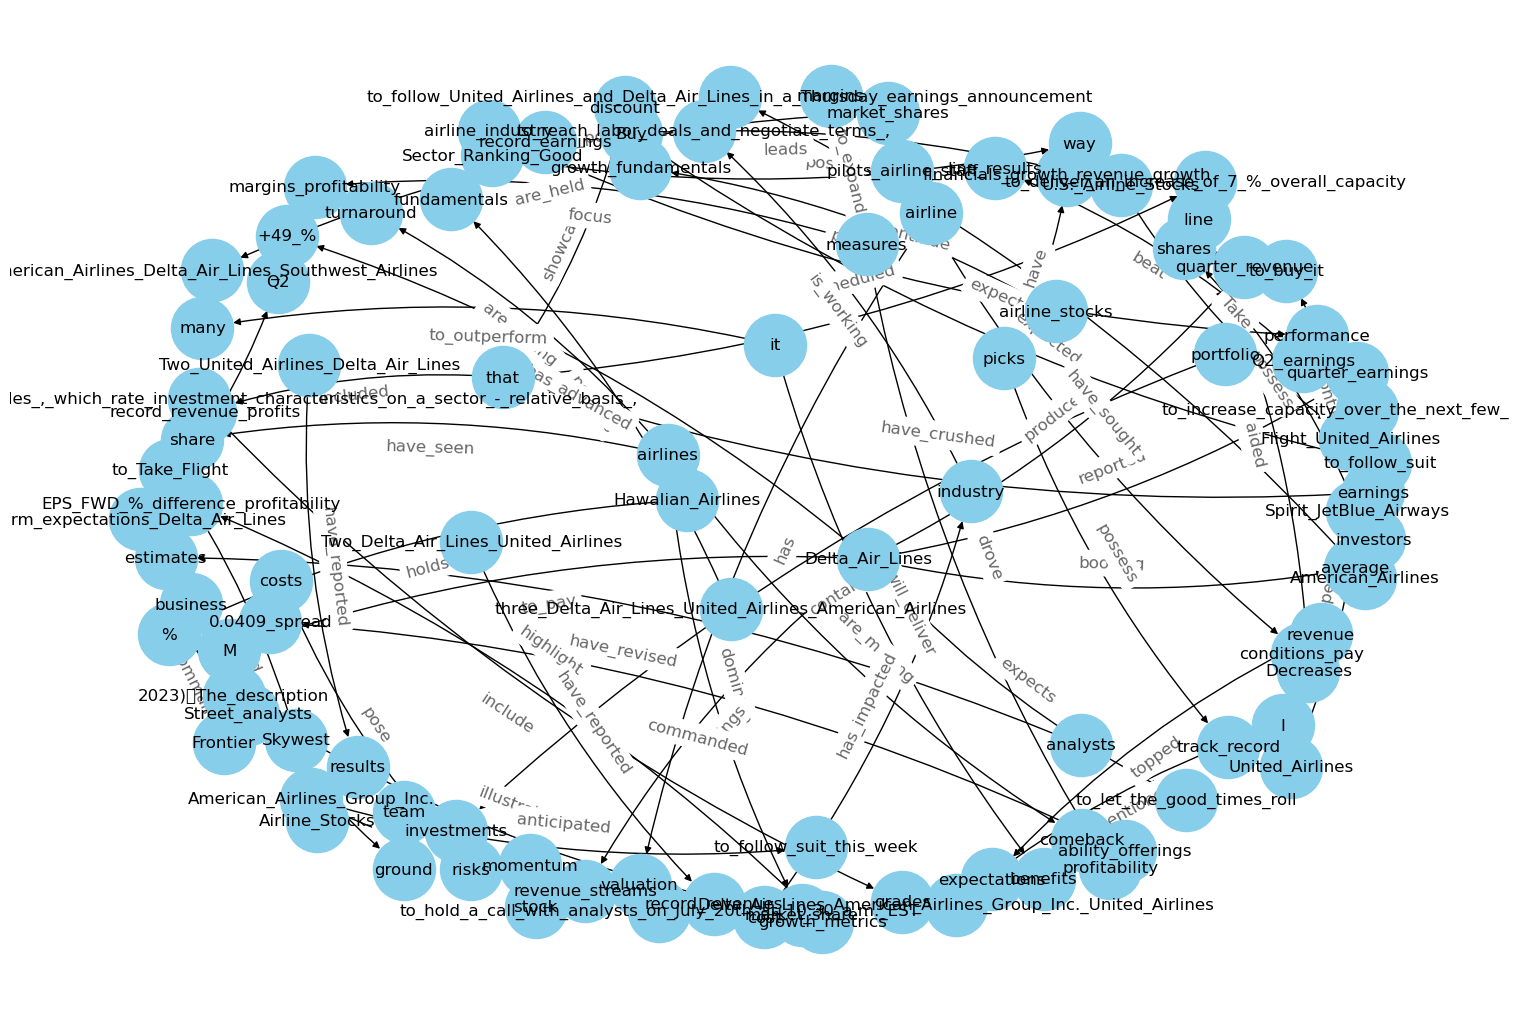

In [64]:
## 创建完整的图形
full_graph = nx.from_pandas_edgelist(dtf, source="entity", target="object", 
                            edge_attr="relation", 
                            create_using=nx.DiGraph())

## 绘图
plt.figure(figsize=(15,10))

pos = nx.spring_layout(full_graph, k=1)  # 设置布局
node_color = "skyblue"  # 设置节点颜色
edge_color = "black"  # 设置边颜色

# 绘制图形，包括节点和边
nx.draw(full_graph, pos=pos, with_labels=True, node_color=node_color, 
        edge_color=edge_color, cmap=plt.cm.Dark2, 
        node_size=2000, connectionstyle='arc3,rad=0.1')

# 绘制边的标签（关系）
nx.draw_networkx_edge_labels(full_graph, pos=pos, label_pos=0.5, 
                             edge_labels=nx.get_edge_attributes(full_graph,'relation'),
                             font_size=12, font_color='black', alpha=0.6)
plt.show()  # 显示图形

In [65]:
dtf['entity'].value_counts().head()

Delta_Air_Lines    7
that               5
airlines           4
measures           3
it                 2
Name: entity, dtype: int64

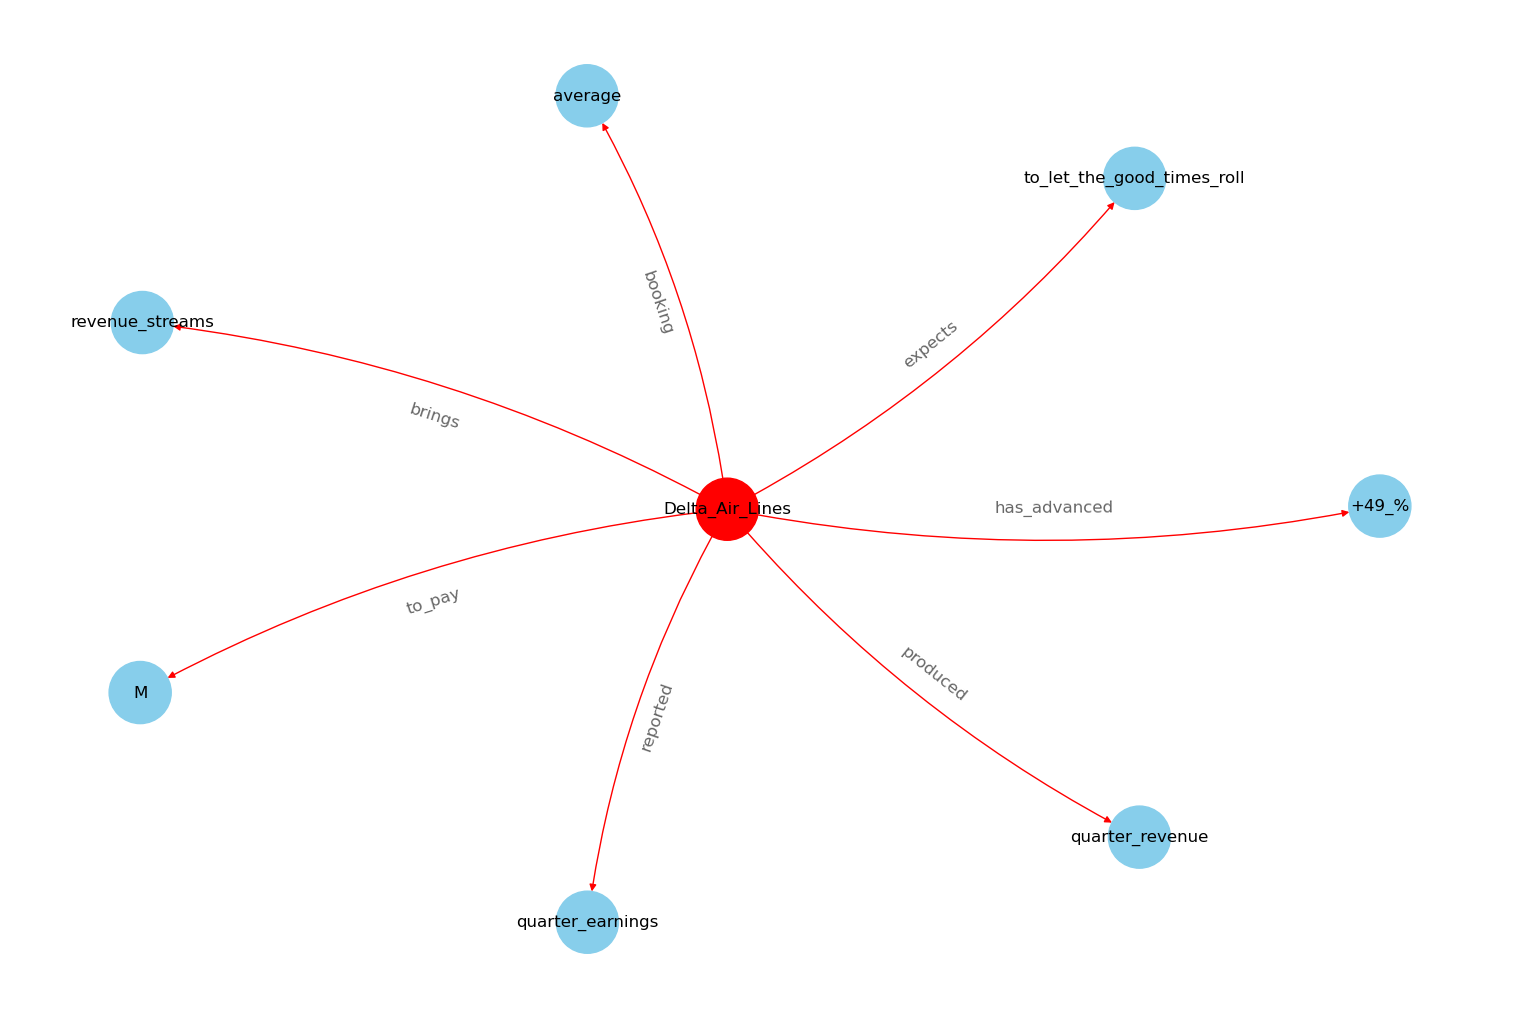

In [66]:
## filter
f = "Delta_Air_Lines"
tmp = dtf[(dtf["entity"]==f) | (dtf["object"]==f)]


## create small graph
G = nx.from_pandas_edgelist(tmp, source="entity", target="object", 
                            edge_attr="relation", 
                            create_using=nx.DiGraph())


## plot
plt.figure(figsize=(15,10))

pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
node_color = ["red" if node==f else "skyblue" for node in G.nodes]
edge_color = ["red" if edge[0]==f else "black" for edge in G.edges]

nx.draw(G, pos=pos, with_labels=True, node_color=node_color, 
        edge_color=edge_color, cmap=plt.cm.Dark2, 
        node_size=2000, node_shape="o", connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                        edge_labels=nx.get_edge_attributes(G,'relation'),
                        font_size=12, font_color='black', alpha=0.6)
plt.show()

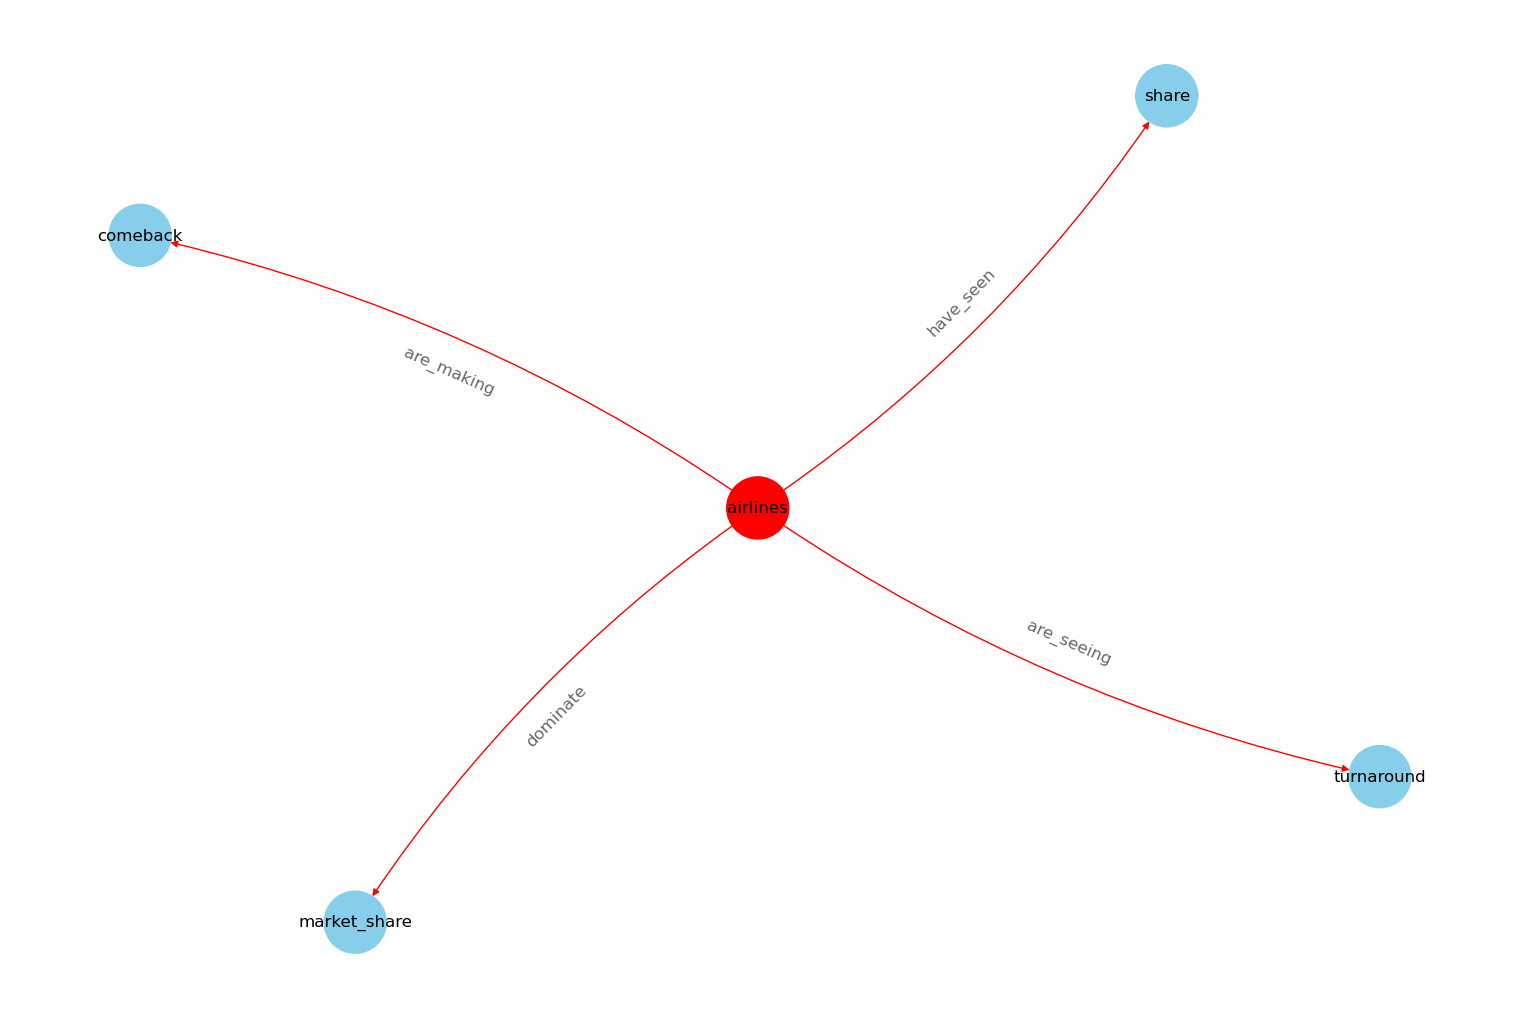

In [67]:
## filter
f = "airlines"
tmp = dtf[(dtf["entity"]==f) | (dtf["object"]==f)]


## create small graph
G = nx.from_pandas_edgelist(tmp, source="entity", target="object", 
                            edge_attr="relation", 
                            create_using=nx.DiGraph())


## plot
plt.figure(figsize=(15,10))

pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
node_color = ["red" if node==f else "skyblue" for node in G.nodes]
edge_color = ["red" if edge[0]==f else "black" for edge in G.edges]

nx.draw(G, pos=pos, with_labels=True, node_color=node_color, 
        edge_color=edge_color, cmap=plt.cm.Dark2, 
        node_size=2000, node_shape="o", connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                        edge_labels=nx.get_edge_attributes(G,'relation'),
                        font_size=12, font_color='black', alpha=0.6)
plt.show()